In [72]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import random

# image reading from file OPENCV(BGR)  MATPLOTLIB(RGB) PILLOW(RGB)
# use split to switch channel or just use cvtColor(img,cv2.COLOR_BGR2RGB)

In [73]:
img_ori = cv2.imread('lenna.jpg',1)# 1 is color image, 0 is gray image
print('img_ori.shape: ',img_ori.shape)

img_ori.shape:  (500, 500, 3)


In [74]:
cv2.imshow('lenna_photo',img_ori)
key = cv2.waitKey(0)
if key == 27:
    cv2.destroyAllWindows()# 27 is ESC, if you do not have this statement, the image cannot be closed

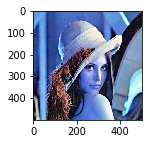

'\nThe array im is probably a 3-D array, with shape (m, n, 3) or (m, n, 4). Check im.shape.\n\nFrom the imshow docstring: "cmap is ignored if X is 3-D".   <- Veryyyy important!!!!!\n\nTo use a colormap, you\'ll have to pass a 2-D array to imshow. \n\nYou could, for example, plot one of the color channels such as im[:,:,0], or plot the average over the three channels, im.mean(axis=2). \n(But if im has shape (m, n, 4), you probably don\'t want to include the alpha channel in the mean.)\n\n'

In [75]:
plt.figure(figsize=(2,2))
plt.imshow(img_ori,cmap='gray')
plt.show()
# it only works when img_ori is 2D
'''
The array im is probably a 3-D array, with shape (m, n, 3) or (m, n, 4). Check im.shape.

From the imshow docstring: "cmap is ignored if X is 3-D".   <- Veryyyy important!!!!!

To use a colormap, you'll have to pass a 2-D array to imshow. 

You could, for example, plot one of the color channels such as im[:,:,0], or plot the average over the three channels, im.mean(axis=2). 
(But if im has shape (m, n, 4), you probably don't want to include the alpha channel in the mean.)

'''

# cmap is ignored if X is 3-D

img_gray.shape:  (500, 500)


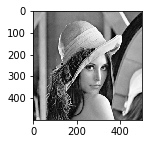

In [76]:
# This is gray image
img_gray = cv2.imread('lenna.jpg',0)# 1 is color image, 0 is gray image
print('img_gray.shape: ',img_gray.shape)
plt.figure(figsize=(2,2))
plt.imshow(img_gray,cmap='gray')
plt.show()

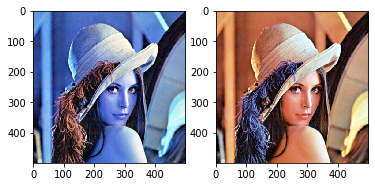

In [77]:
plt.subplot(121) # Because opencv is BGR, plt is RGB, it needs conversion
plt.imshow(img_ori)
plt.subplot(122)
plt.imshow(cv2.cvtColor(img_ori,cv2.COLOR_BGR2RGB))
plt.show()

In [78]:
def my_show(img, size=(3,3)):
    plt.figure(figsize=size)
    plt.imshow(cv2.cvtColor(img,cv2.COLOR_BGR2RGB))
    plt.show()

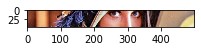

In [79]:
my_show(img_ori[150:300][100:200]) # first [] select row#, second [] select column#

# channel split

In [80]:
B,G,R = cv2.split(img_ori)
print('B.shape: ',B.shape)

B.shape:  (500, 500)


In [81]:
cv2.imshow('B',B)# because it is 2D, they will be regarded as gray image
cv2.imshow('G',G)
cv2.imshow('R',R)
key = cv2.waitKey(0)
if key == 27:
    cv2.destroyAllWindows()

In [82]:
def img_cooler(img,b_increase, r_decrease):
    B,G,R = cv2.split(img_ori)
    b_lim = 255-b_increase
    B[B>b_lim] = 255
    B[B<=b_lim] = (b_increase + B[B<=b_lim]).astype(img.dtype)
    '''
    ndarray.astype(dtype, order='K', casting='unsafe', subok=True, copy=True)
    Copy of the array, cast to a specified type.
    
    很多时候我们用numpy从文本文件读取数据作为numpy的数组，默认的dtype是float64
    但是有些场合我们希望有些数据列作为整数, 如果直接改dtype='int'的话，就会出错！原因如上，数组长度翻倍了！！！
    change to img.dtype
    '''
    r_lim = r_decrease
    R[R<r_lim] = 0
    R[R>=r_lim] = (R[R>=r_lim] - r_decrease).astype(img.dtype)
    return cv2.merge((B,G,R))

In [83]:
print('img.dtype: ',img_ori.dtype)

img.dtype:  uint8


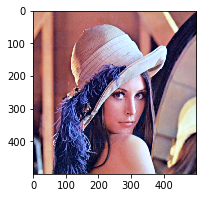

In [84]:
cooler_image = img_cooler(img_ori,30,10)
my_show(cooler_image)

## Gamma Change

In [85]:
def adjust_gamma(img, gamma=1.0):
    invGamma = 1.0/gamma
    table = []
    for i in range(256):
        table.append(((i/255.0)**invGamma)*255)# create a list of constant, gamma>1 table decreasing, gamma<1 table increasing
    table = np.array(table).astype('uint8')
    return cv2.LUT(img,table)
'''
因此，对于较大的图像，通过使用查找表，预先计算所有可能的值，并且在分配期间仅仅进行分配是明智的。
查找表是简单的数组（具有一个或多个维），对于给定的输入值变量保存最终的输出值。
它的优点在于我们不需要进行计算，只需要读取结果。
Prepare all possible input and corresponding output, just like mapping
'''

'\n因此，对于较大的图像，通过使用查找表，预先计算所有可能的值，并且在分配期间仅仅进行分配是明智的。\n查找表是简单的数组（具有一个或多个维），对于给定的输入值变量保存最终的输出值。\n它的优点在于我们不需要进行计算，只需要读取结果。\nPrepare all possible input and corresponding output, just like mapping\n'

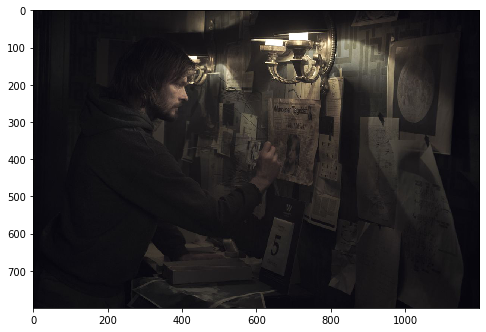

In [86]:
img_dark = cv2.imread('dark.jpg',1)
my_show(img_dark,size=(8,8))

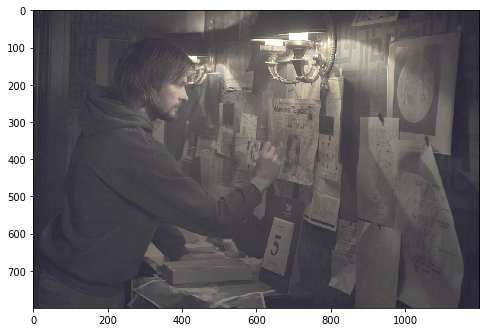

In [87]:
img_brighter = adjust_gamma(img_dark,2)
my_show(img_brighter,size=(8,8))

## Histogram equalization

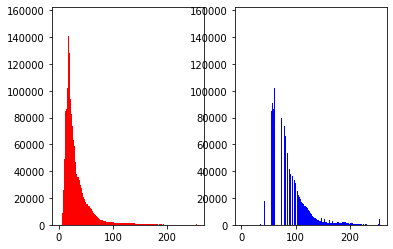

"\nmatplotlib.pyplot.hist(x,\xa0bins=None,\xa0range=None,\xa0normed=False,\xa0\nweights=None,\xa0cumulative=False,\xa0bottom=None,\xa0histtype='bar',\xa0\nalign='mid',\xa0orientation='vertical',\xa0rwidth=None,\xa0log=False,\xa0\ncolor=None,\xa0label=None,\xa0stacked=False,\xa0hold=None,\xa0data=None,\xa0**kwargs)¶\n\n"

In [88]:
plt.subplot(121)
plt.hist(img_dark.flatten(),256,[0,256],color='r')# 256 column, range 0-256
plt.subplot(122)
plt.hist(img_brighter.flatten(),256,[0,256],color='b')
plt.show()
'''
ndarray.flatten(order='C')
Return a copy of the array collapsed into one dimension.

	
order : {‘C’, ‘F’, ‘A’, ‘K’}, optional
‘C’ means to flatten in row-major (C-style) order. 
‘F’ means to flatten in column-major (Fortran- style) order. 
‘A’ means to flatten in column-major order if a is Fortran contiguous in memory, row-major order otherwise. 
‘K’ means to flatten a in the order the elements occur in memory. The default is ‘C’.

'''
'''
matplotlib.pyplot.hist(x, bins=None, range=None, normed=False, 
weights=None, cumulative=False, bottom=None, histtype='bar', 
align='mid', orientation='vertical', rwidth=None, log=False, 
color=None, label=None, stacked=False, hold=None, data=None, **kwargs)¶

'''

## YUV Adjust Y to do Histogram equalization and Brighten the picture

In [89]:
img_yuv = cv2.cvtColor(img_dark,cv2.COLOR_BGR2YUV) 
img_yuv[:,:,0] = cv2.equalizeHist(img_yuv[:,:,0]) 
img_output = cv2.cvtColor(img_yuv,cv2.COLOR_YUV2BGR) 

'''
https://docs.opencv.org/master/d5/daf/tutorial_py_histogram_equalization.html
https://zh.wikipedia.org/wiki/%E7%9B%B4%E6%96%B9%E5%9B%BE%E5%9D%87%E8%A1%A1%E5%8C%96

It contain several formula to increase image global contrast(laterally expand the histogram)
'''

'\nhttps://docs.opencv.org/master/d5/daf/tutorial_py_histogram_equalization.html\nhttps://zh.wikipedia.org/wiki/%E7%9B%B4%E6%96%B9%E5%9B%BE%E5%9D%87%E8%A1%A1%E5%8C%96\n\nIt contain several formula to increase image global contrast(laterally expand the histogram)\n'

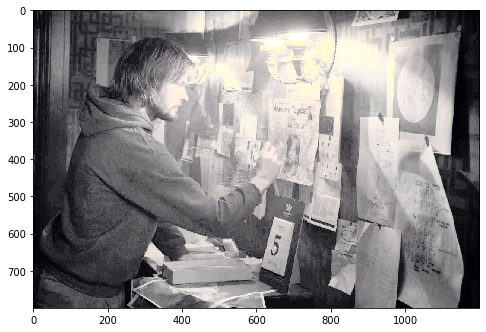

In [90]:
my_show(img_output,size=(8,8))

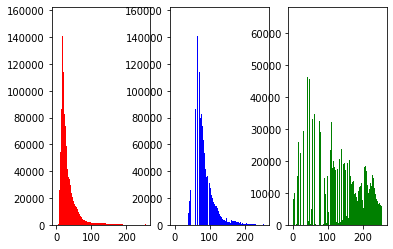

In [91]:
plt.subplot(131)
plt.hist(img_dark.flatten(),256,[0,256],color='r')
plt.subplot(132)
plt.hist(img_brighter.flatten(),256,[0,256],color='b')
plt.subplot(133)
plt.hist(img_output.flatten(),256,[0,256],color='g')
plt.show()

# transform

In [92]:
## perspective transform

In [93]:
pts1 = np.float32([[0,0],[0,500],[500,0],[500,500]])  #source
pts2 = np.float32([[5,19],[19,460],[460,9],[410,420]])  # target

M = cv2.getPerspectiveTransform(pts1,pts2)  # Get Homography matrix by 'getPerspectiveTransform()'
img_warp = cv2.warpPerspective(img_ori,M,(500,500))  # warp is with Homography matrix
'''
Python: cv2.warpPerspective(src, M, dsize[, dst[, flags[, borderMode[, borderValue]]]]) → dst
https://docs.opencv.org/2.4/modules/imgproc/doc/geometric_transformations.html
'''

'\nPython: cv2.warpPerspective(src, M, dsize[, dst[, flags[, borderMode[, borderValue]]]]) → dst\nhttps://docs.opencv.org/2.4/modules/imgproc/doc/geometric_transformations.html\n'

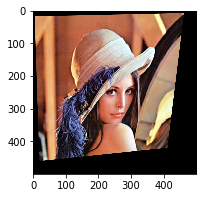

In [94]:
my_show(img_warp)

## Rotation: need to get affine transform matrix from getRotationMatrix2D() and warp it using warpAffine()
# getRotationMatrix2D() input: center, angle, scale

In [95]:
'''

cv::Mat cv::getRotationMatrix2D( Point2f center, double angle, double scale )
{
	// 角度转换
	angle *= CV_PI/180;
	// 计算旋转矩阵角度
	double alpha = cos(angle)*scale;
	double beta = sin(angle)*scale;
	Mat M(2, 3, CV_64F);
	double* m = (double*)M.data;
	// 构建旋转矩阵
	m[0] = alpha;
	m[1] = beta;
	m[2] = (1-alpha)*center.x - beta*center.y;
	m[3] = -beta;
	m[4] = alpha;
	m[5] = beta*center.x + (1-alpha)*center.y;
	return M;
}
'''

'\n\ncv::Mat cv::getRotationMatrix2D( Point2f center, double angle, double scale )\n{\n\t// 角度转换\n\tangle *= CV_PI/180;\n\t// 计算旋转矩阵角度\n\tdouble alpha = cos(angle)*scale;\n\tdouble beta = sin(angle)*scale;\n\tMat M(2, 3, CV_64F);\n\tdouble* m = (double*)M.data;\n\t// 构建旋转矩阵\n\tm[0] = alpha;\n\tm[1] = beta;\n\tm[2] = (1-alpha)*center.x - beta*center.y;\n\tm[3] = -beta;\n\tm[4] = alpha;\n\tm[5] = beta*center.x + (1-alpha)*center.y;\n\treturn M;\n}\n'

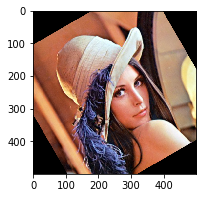

[[  0.8660254    0.5        -91.50635095]
 [ -0.5          0.8660254  158.49364905]]


In [96]:
img = img_ori
M = cv2.getRotationMatrix2D((img_ori.shape[1]/2,img_ori.shape[0]/2),30,1) #shape[1]first*, as row number
img_rotate = cv2.warpAffine(img,M,(img.shape[1], img.shape[0]))
my_show(img_rotate)
print(M)

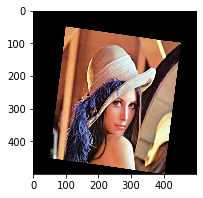

In [97]:
# Affine Transform
rows, cols, ch = img.shape
pts1 = np.float32([[0, 0], [cols - 1, 0], [0, rows - 1]])# shape-1: the pixel of corner, default start from top left corner
pts2 = np.float32([[cols * 0.2, rows * 0.1], [cols * 0.9, rows * 0.2], [cols * 0.1, rows * 0.9]])# it is a good way to avoid exact number
 
M = cv2.getAffineTransform(pts1, pts2)
dst = cv2.warpAffine(img, M, (cols, rows))
my_show(dst)

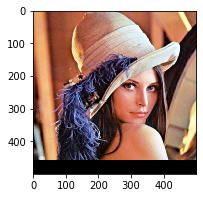

[[ 1.44335399e+00  1.09077700e-01 -5.53863256e+01]
 [ 2.10234966e-01  1.23241336e+00 -9.85582228e+01]
 [ 4.64732493e-04  2.60227331e-04  1.00000000e+00]]


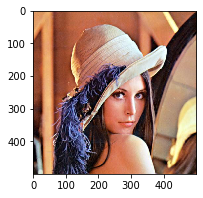

[[ 1.00000000e+00  4.72277450e-15 -1.46689084e-12]
 [-6.54366833e-17  1.00000000e+00 -7.39582007e-13]
 [-3.27865609e-18  1.20021690e-17  1.00000000e+00]]


In [98]:
def random_warp(img, row, col):
    height, width, channels = img.shape

    # warp:
    random_margin = 60
    x1 = random.randint(-random_margin, random_margin)
    y1 = random.randint(-random_margin, random_margin)
    x2 = random.randint(width - random_margin - 1, width - 1)
    y2 = random.randint(-random_margin, random_margin)
    x3 = random.randint(width - random_margin - 1, width - 1)
    y3 = random.randint(height - random_margin - 1, height - 1)
    x4 = random.randint(-random_margin, random_margin)
    y4 = random.randint(height - random_margin - 1, height - 1)

    dx1 = random.randint(-random_margin, random_margin)
    dy1 = random.randint(-random_margin, random_margin)
    dx2 = random.randint(width - random_margin - 1, width - 1)
    dy2 = random.randint(-random_margin, random_margin)
    dx3 = random.randint(width - random_margin - 1, width - 1)
    dy3 = random.randint(height - random_margin - 1, height - 1)
    dx4 = random.randint(-random_margin, random_margin)
    dy4 = random.randint(height - random_margin - 1, height - 1)

    pts1 = np.float32([[x1, y1], [x2, y2], [x3, y3], [x4, y4]])
    pts2 = np.float32([[dx1, dy1], [dx2, dy2], [dx3, dy3], [dx4, dy4]])
    M_warp = cv2.getPerspectiveTransform(pts1, pts2)
    img_warp = cv2.warpPerspective(img, M_warp, (width, height))
    return M_warp, img_warp

def not_random_warp(img, row, col):
    height, width, channels = img.shape ## Pixel on the border can only minus random number(uppper bound) or plus random number(lower bound)
    x1 = 0
    y1 = 0
    x2 = width - 1
    y2 = 0
    x3 = width - 1
    y3 = height - 1
    x4 = 0
    y4 = height - 1

    dx1 = 0
    dy1 = 0
    dx2 = width - 1
    dy2 = 0
    dx3 = width - 1
    dy3 = height - 1
    dx4 = 0
    dy4 = height - 1
    
    pts1 = np.float32([[x1, y1], [x2, y2], [x3, y3], [x4, y4]])
    pts2 = np.float32([[dx1, dy1], [dx2, dy2], [dx3, dy3], [dx4, dy4]])
    M_warp = cv2.getPerspectiveTransform(pts1, pts2)
    img_warp = cv2.warpPerspective(img, M_warp, (width, height))
    return M_warp, img_warp

M_warp, img_warp = random_warp(img, img.shape[0], img.shape[1])
M_not_warp, img_not_warp = not_random_warp(img, img.shape[0], img.shape[1])
my_show(img_warp)
print(M_warp)
my_show(img_not_warp)
print(M_not_warp)

# dilate & erosion

In [106]:
img_writing = cv2.imread('libai.png',0)

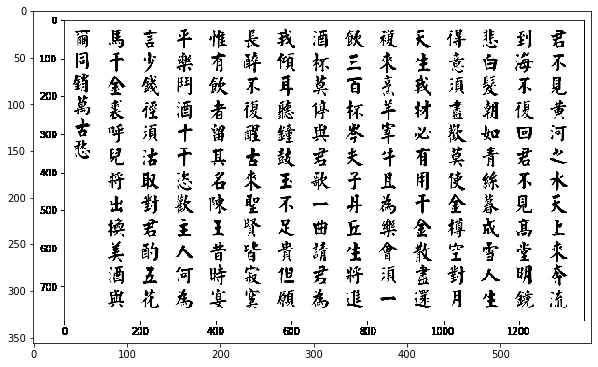

In [107]:
plt.figure(figsize=(10,8))
plt.imshow(img_writing,cmap='gray')
plt.show()

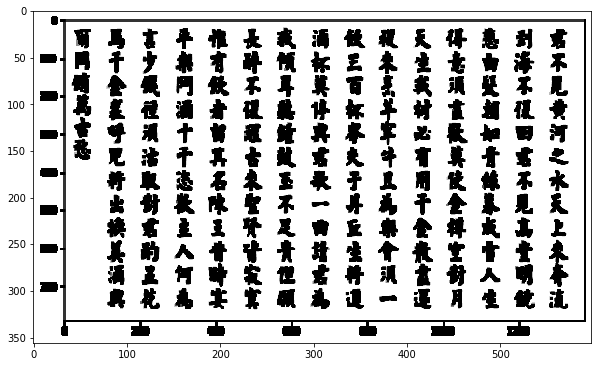

In [108]:
erode_writing = cv2.erode(img_writing,None,iterations=1)
plt.figure(figsize=(10,8))
plt.imshow(erode_writing,cmap='gray')
plt.show()

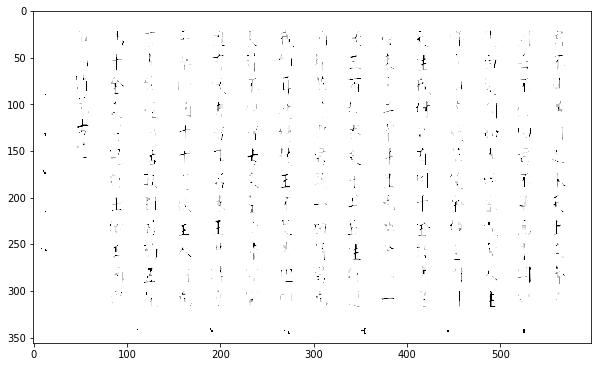

In [109]:
dilate_writing = cv2.dilate(img_writing,None,iterations=1)
plt.figure(figsize=(10,8))
plt.imshow(dilate_writing,cmap='gray')
plt.show()